# Supervised Sequence Classification

While unsupervised methods can be powerful to identify antigen-specific sequences, being able to leverage known labels to guide the learning process can provide for better results, provided there is a sufficient amount of data to learn from. The first type of supervised learning we will explore within DeepTCR is being able to correctly classify a given TCR sequence to some label (i.e. its antigen specificity) from using its sequence information.

First we will load data from the Murine dataset which has TCR sequences from 9 murine antigens with beta-chain information including sequence, v-beta, and j-beta gene usage.

In [1]:
import sys
sys.path.append('../../')
from DeepTCR.DeepTCR import DeepTCR_SS

# Instantiate training object
DTCR_SS = DeepTCR_SS('Tutorial')

#Load Data from directories
DTCR_SS.Get_Data(directory='../../Data/Murine_Antigens',Load_Prev_Data=False,aggregate_by_aa=True,
               aa_column_beta=0,count_column=1,v_beta_column=2,j_beta_column=3)

Loading Data...
Embedding Sequences...
Data Loaded


We will then train the sequence classifier as follows. First, we will split the dataset into a train,validation,and independent test cohort so we can assess how generalizable our model will be to new unseen data.And then we will train our sequene classifier. Our test_size parameter will tell DeepTCR how much of the data to leave out for valid/test which is split evenly across these two.

In [2]:
DTCR_SS.Get_Train_Valid_Test(test_size=0.25)
DTCR_SS.Train()

W1004 19:35:15.295836 140338515621696 deprecation_wrapper.py:119] From ../../DeepTCR/functions/Layers.py:130: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1004 19:35:15.304923 140338515621696 deprecation_wrapper.py:119] From ../../DeepTCR/functions/Layers.py:140: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1004 19:35:15.308014 140338515621696 deprecation_wrapper.py:119] From ../../DeepTCR/functions/Layers.py:141: The name tf.sparse.placeholder is deprecated. Please use tf.compat.v1.sparse.placeholder instead.

W1004 19:35:15.317007 140338515621696 deprecation_wrapper.py:119] From ../../DeepTCR/functions/Layers.py:12: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.

W1004 19:35:15.319694 140338515621696 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (fro

Training_Statistics: 
 Epoch: 1/10000 Training loss: 2.21900 Validation loss: 2.11338 Testing loss: 2.11895 Training Accuracy: 0.15009 Validation Accuracy: 0.19344 Testing AUC: 0.48558
Training_Statistics: 
 Epoch: 2/10000 Training loss: 2.08083 Validation loss: 1.99542 Testing loss: 1.99994 Training Accuracy: 0.26232 Validation Accuracy: 0.36393 Testing AUC: 0.52077
Training_Statistics: 
 Epoch: 3/10000 Training loss: 1.96063 Validation loss: 1.89899 Testing loss: 1.90433 Training Accuracy: 0.36298 Validation Accuracy: 0.3541 Testing AUC: 0.54812
Training_Statistics: 
 Epoch: 4/10000 Training loss: 1.87397 Validation loss: 1.85354 Testing loss: 1.86099 Training Accuracy: 0.35722 Validation Accuracy: 0.3541 Testing AUC: 0.57134
Training_Statistics: 
 Epoch: 5/10000 Training loss: 1.84259 Validation loss: 1.85090 Testing loss: 1.85929 Training Accuracy: 0.35375 Validation Accuracy: 0.3541 Testing AUC: 0.59919
Training_Statistics: 
 Epoch: 6/10000 Training loss: 1.83596 Validation loss: 

Training_Statistics: 
 Epoch: 46/10000 Training loss: 1.01209 Validation loss: 1.33730 Testing loss: 1.24025 Training Accuracy: 0.66878 Validation Accuracy: 0.52787 Testing AUC: 0.83979
Training_Statistics: 
 Epoch: 47/10000 Training loss: 1.00376 Validation loss: 1.33297 Testing loss: 1.23769 Training Accuracy: 0.66832 Validation Accuracy: 0.53443 Testing AUC: 0.84041
Training_Statistics: 
 Epoch: 48/10000 Training loss: 0.98702 Validation loss: 1.33136 Testing loss: 1.23639 Training Accuracy: 0.68198 Validation Accuracy: 0.54426 Testing AUC: 0.84129
Training_Statistics: 
 Epoch: 49/10000 Training loss: 0.97562 Validation loss: 1.33256 Testing loss: 1.23684 Training Accuracy: 0.68079 Validation Accuracy: 0.53115 Testing AUC: 0.84243
Training_Statistics: 
 Epoch: 50/10000 Training loss: 0.96215 Validation loss: 1.32804 Testing loss: 1.23471 Training Accuracy: 0.68079 Validation Accuracy: 0.5377 Testing AUC: 0.84259
Training_Statistics: 
 Epoch: 51/10000 Training loss: 0.94967 Validatio

When we are done training, we can assess how well our classifier performs on the independent test set via looking at the ROC curves.

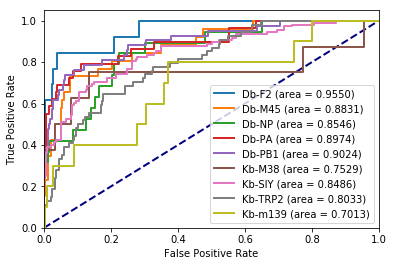

In [3]:
DTCR_SS.AUC_Curve()

We can also train our classifier with two other methods that allow for multiple iterations including a Monte Carlo method and K-Fold Cross-Validation Method.

For the Monte-Carlo method, we will specify the number of times we want to train train the classifier and the test size we want for each iteration. Of note, all parameters available for the Train method are also inputs for the Monte-Carlo and K-Fold Cross-Validation method.

In [4]:
DTCR_SS.Monte_Carlo_CrossVal(test_size=0.25,folds=5)

0
Training_Statistics: 
 Epoch: 1/10000 Training loss: 2.21722 Validation loss: 2.12657 Testing loss: 2.11480 Training Accuracy: 0.11205 Validation Accuracy: 0.2623 Testing AUC: 0.5008
Training_Statistics: 
 Epoch: 2/10000 Training loss: 2.08199 Validation loss: 2.00179 Testing loss: 1.99444 Training Accuracy: 0.32465 Validation Accuracy: 0.3541 Testing AUC: 0.53707
Training_Statistics: 
 Epoch: 3/10000 Training loss: 1.96362 Validation loss: 1.90090 Testing loss: 1.89859 Training Accuracy: 0.3539 Validation Accuracy: 0.3541 Testing AUC: 0.56552
Training_Statistics: 
 Epoch: 4/10000 Training loss: 1.88100 Validation loss: 1.86092 Testing loss: 1.86510 Training Accuracy: 0.35375 Validation Accuracy: 0.3541 Testing AUC: 0.58776
Training_Statistics: 
 Epoch: 5/10000 Training loss: 1.85087 Validation loss: 1.85116 Testing loss: 1.85905 Training Accuracy: 0.35558 Validation Accuracy: 0.3541 Testing AUC: 0.61446
Training_Statistics: 
 Epoch: 6/10000 Training loss: 1.83665 Validation loss: 1.

Training_Statistics: 
 Epoch: 46/10000 Training loss: 1.01129 Validation loss: 1.24187 Testing loss: 1.19734 Training Accuracy: 0.66911 Validation Accuracy: 0.57049 Testing AUC: 0.87116
Training_Statistics: 
 Epoch: 47/10000 Training loss: 0.99917 Validation loss: 1.23896 Testing loss: 1.19257 Training Accuracy: 0.66896 Validation Accuracy: 0.57705 Testing AUC: 0.87291
Training_Statistics: 
 Epoch: 48/10000 Training loss: 0.98179 Validation loss: 1.24552 Testing loss: 1.18632 Training Accuracy: 0.67533 Validation Accuracy: 0.57705 Testing AUC: 0.87377
Training_Statistics: 
 Epoch: 49/10000 Training loss: 0.97581 Validation loss: 1.24505 Testing loss: 1.18024 Training Accuracy: 0.68426 Validation Accuracy: 0.58033 Testing AUC: 0.87479
Training_Statistics: 
 Epoch: 50/10000 Training loss: 0.96154 Validation loss: 1.24315 Testing loss: 1.17685 Training Accuracy: 0.69344 Validation Accuracy: 0.57705 Testing AUC: 0.87582
Training_Statistics: 
 Epoch: 51/10000 Training loss: 0.95315 Validati

Training_Statistics: 
 Epoch: 38/10000 Training loss: 1.09756 Validation loss: 1.30374 Testing loss: 1.21437 Training Accuracy: 0.63191 Validation Accuracy: 0.56721 Testing AUC: 0.85944
Training_Statistics: 
 Epoch: 39/10000 Training loss: 1.08138 Validation loss: 1.29949 Testing loss: 1.20913 Training Accuracy: 0.6362 Validation Accuracy: 0.56721 Testing AUC: 0.86128
Training_Statistics: 
 Epoch: 40/10000 Training loss: 1.06705 Validation loss: 1.29751 Testing loss: 1.20218 Training Accuracy: 0.63681 Validation Accuracy: 0.56066 Testing AUC: 0.86195
Training_Statistics: 
 Epoch: 41/10000 Training loss: 1.04866 Validation loss: 1.29643 Testing loss: 1.19648 Training Accuracy: 0.64743 Validation Accuracy: 0.55738 Testing AUC: 0.86343
Training_Statistics: 
 Epoch: 42/10000 Training loss: 1.03746 Validation loss: 1.29541 Testing loss: 1.19290 Training Accuracy: 0.65132 Validation Accuracy: 0.55738 Testing AUC: 0.86494
Training_Statistics: 
 Epoch: 43/10000 Training loss: 1.02681 Validatio

Training_Statistics: 
 Epoch: 31/10000 Training loss: 1.20897 Validation loss: 1.31894 Testing loss: 1.35475 Training Accuracy: 0.58812 Validation Accuracy: 0.53443 Testing AUC: 0.82417
Training_Statistics: 
 Epoch: 32/10000 Training loss: 1.19323 Validation loss: 1.31197 Testing loss: 1.34878 Training Accuracy: 0.59651 Validation Accuracy: 0.52459 Testing AUC: 0.82448
Training_Statistics: 
 Epoch: 33/10000 Training loss: 1.17103 Validation loss: 1.30440 Testing loss: 1.33698 Training Accuracy: 0.6017 Validation Accuracy: 0.52459 Testing AUC: 0.82612
Training_Statistics: 
 Epoch: 34/10000 Training loss: 1.15801 Validation loss: 1.29641 Testing loss: 1.32415 Training Accuracy: 0.60948 Validation Accuracy: 0.52787 Testing AUC: 0.82926
Training_Statistics: 
 Epoch: 35/10000 Training loss: 1.14119 Validation loss: 1.29235 Testing loss: 1.31576 Training Accuracy: 0.61745 Validation Accuracy: 0.53115 Testing AUC: 0.83103
Training_Statistics: 
 Epoch: 36/10000 Training loss: 1.11820 Validatio

Training_Statistics: 
 Epoch: 26/10000 Training loss: 1.33586 Validation loss: 1.37886 Testing loss: 1.45535 Training Accuracy: 0.52417 Validation Accuracy: 0.4918 Testing AUC: 0.7988
Training_Statistics: 
 Epoch: 27/10000 Training loss: 1.31396 Validation loss: 1.36460 Testing loss: 1.44694 Training Accuracy: 0.53042 Validation Accuracy: 0.49836 Testing AUC: 0.79994
Training_Statistics: 
 Epoch: 28/10000 Training loss: 1.29693 Validation loss: 1.35306 Testing loss: 1.43833 Training Accuracy: 0.54161 Validation Accuracy: 0.51475 Testing AUC: 0.80228
Training_Statistics: 
 Epoch: 29/10000 Training loss: 1.27531 Validation loss: 1.34327 Testing loss: 1.43026 Training Accuracy: 0.55104 Validation Accuracy: 0.52787 Testing AUC: 0.80412
Training_Statistics: 
 Epoch: 30/10000 Training loss: 1.25326 Validation loss: 1.33434 Testing loss: 1.42295 Training Accuracy: 0.56158 Validation Accuracy: 0.53443 Testing AUC: 0.80637
Training_Statistics: 
 Epoch: 31/10000 Training loss: 1.23543 Validation

Training_Statistics: 
 Epoch: 7/10000 Training loss: 1.82638 Validation loss: 1.80583 Testing loss: 1.82583 Training Accuracy: 0.35429 Validation Accuracy: 0.3541 Testing AUC: 0.69346
Training_Statistics: 
 Epoch: 8/10000 Training loss: 1.78458 Validation loss: 1.77113 Testing loss: 1.79056 Training Accuracy: 0.35494 Validation Accuracy: 0.36066 Testing AUC: 0.71131
Training_Statistics: 
 Epoch: 9/10000 Training loss: 1.75257 Validation loss: 1.75359 Testing loss: 1.77300 Training Accuracy: 0.37348 Validation Accuracy: 0.38033 Testing AUC: 0.72197
Training_Statistics: 
 Epoch: 10/10000 Training loss: 1.73648 Validation loss: 1.74138 Testing loss: 1.76180 Training Accuracy: 0.3932 Validation Accuracy: 0.39344 Testing AUC: 0.72984
Training_Statistics: 
 Epoch: 11/10000 Training loss: 1.71976 Validation loss: 1.72596 Testing loss: 1.74742 Training Accuracy: 0.41735 Validation Accuracy: 0.4 Testing AUC: 0.73839
Training_Statistics: 
 Epoch: 12/10000 Training loss: 1.70237 Validation loss: 

Training_Statistics: 
 Epoch: 52/10000 Training loss: 0.92828 Validation loss: 1.28068 Testing loss: 1.28418 Training Accuracy: 0.68851 Validation Accuracy: 0.5541 Testing AUC: 0.85856
Training_Statistics: 
 Epoch: 53/10000 Training loss: 0.91381 Validation loss: 1.28659 Testing loss: 1.27971 Training Accuracy: 0.68751 Validation Accuracy: 0.55738 Testing AUC: 0.85987
Training_Statistics: 
 Epoch: 54/10000 Training loss: 0.90699 Validation loss: 1.28006 Testing loss: 1.27409 Training Accuracy: 0.68568 Validation Accuracy: 0.57377 Testing AUC: 0.86166
Training_Statistics: 
 Epoch: 55/10000 Training loss: 0.88953 Validation loss: 1.28709 Testing loss: 1.27960 Training Accuracy: 0.70494 Validation Accuracy: 0.57049 Testing AUC: 0.86145
Training_Statistics: 
 Epoch: 56/10000 Training loss: 0.88062 Validation loss: 1.28079 Testing loss: 1.27437 Training Accuracy: 0.69801 Validation Accuracy: 0.57049 Testing AUC: 0.86207
Training_Statistics: 
 Epoch: 57/10000 Training loss: 0.86859 Validatio

Once again, we can view the AUC curve.

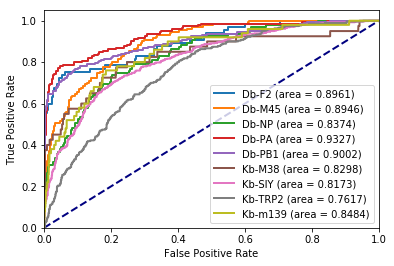

In [5]:
DTCR_SS.AUC_Curve()

To run a K-fold cross validation with 5 folds of the data, fun the following command. In this case, no test_size is required as the algorithm is trained on the entirety of the train folds and tested on the out-fold.

In [6]:
DTCR_SS.K_Fold_CrossVal(folds=5)

0
Training_Statistics: 
 Epoch: 1/10000 Training loss: 2.17900 Validation loss: 2.11661 Testing loss: 2.10949 Training Accuracy: 0.10933 Validation Accuracy: 0.26899 Testing AUC: 0.46933
Training_Statistics: 
 Epoch: 2/10000 Training loss: 2.08444 Validation loss: 2.03432 Testing loss: 2.02139 Training Accuracy: 0.31417 Validation Accuracy: 0.34292 Testing AUC: 0.49514
Training_Statistics: 
 Epoch: 3/10000 Training loss: 1.99124 Validation loss: 1.96070 Testing loss: 1.94110 Training Accuracy: 0.35701 Validation Accuracy: 0.33881 Testing AUC: 0.5179
Training_Statistics: 
 Epoch: 4/10000 Training loss: 1.90752 Validation loss: 1.90229 Testing loss: 1.87517 Training Accuracy: 0.35451 Validation Accuracy: 0.34086 Testing AUC: 0.53799
Training_Statistics: 
 Epoch: 5/10000 Training loss: 1.85615 Validation loss: 1.87383 Testing loss: 1.83917 Training Accuracy: 0.34871 Validation Accuracy: 0.34292 Testing AUC: 0.55597
Training_Statistics: 
 Epoch: 6/10000 Training loss: 1.83424 Validation lo

Training_Statistics: 
 Epoch: 47/10000 Training loss: 0.96717 Validation loss: 1.36468 Testing loss: 1.32359 Training Accuracy: 0.66821 Validation Accuracy: 0.55236 Testing AUC: 0.83189
Training_Statistics: 
 Epoch: 48/10000 Training loss: 0.93214 Validation loss: 1.36310 Testing loss: 1.33099 Training Accuracy: 0.67857 Validation Accuracy: 0.53799 Testing AUC: 0.83243
Training_Statistics: 
 Epoch: 49/10000 Training loss: 0.92472 Validation loss: 1.37199 Testing loss: 1.32486 Training Accuracy: 0.66795 Validation Accuracy: 0.55441 Testing AUC: 0.83136
Training_Statistics: 
 Epoch: 50/10000 Training loss: 0.91818 Validation loss: 1.37324 Testing loss: 1.32258 Training Accuracy: 0.68323 Validation Accuracy: 0.53799 Testing AUC: 0.83212
Training_Statistics: 
 Epoch: 51/10000 Training loss: 0.89758 Validation loss: 1.36574 Testing loss: 1.32715 Training Accuracy: 0.68689 Validation Accuracy: 0.54415 Testing AUC: 0.83461
Done Training
Accuracy = 0.5215605749486653
1
Training_Statistics: 
 E

Training_Statistics: 
 Epoch: 44/10000 Training loss: 0.99729 Validation loss: 1.37765 Testing loss: 1.24509 Training Accuracy: 0.65827 Validation Accuracy: 0.52977 Testing AUC: 0.82907
Training_Statistics: 
 Epoch: 45/10000 Training loss: 0.98363 Validation loss: 1.37739 Testing loss: 1.24299 Training Accuracy: 0.65531 Validation Accuracy: 0.53593 Testing AUC: 0.82982
Training_Statistics: 
 Epoch: 46/10000 Training loss: 0.98145 Validation loss: 1.37276 Testing loss: 1.24268 Training Accuracy: 0.66129 Validation Accuracy: 0.54004 Testing AUC: 0.82951
Training_Statistics: 
 Epoch: 47/10000 Training loss: 0.94712 Validation loss: 1.37948 Testing loss: 1.25008 Training Accuracy: 0.67649 Validation Accuracy: 0.52567 Testing AUC: 0.82817
Training_Statistics: 
 Epoch: 48/10000 Training loss: 0.94200 Validation loss: 1.38699 Testing loss: 1.24391 Training Accuracy: 0.67227 Validation Accuracy: 0.54004 Testing AUC: 0.82817
Training_Statistics: 
 Epoch: 49/10000 Training loss: 0.93907 Validati

Training_Statistics: 
 Epoch: 36/10000 Training loss: 1.12718 Validation loss: 1.28148 Testing loss: 1.29186 Training Accuracy: 0.62786 Validation Accuracy: 0.56879 Testing AUC: 0.83361
Training_Statistics: 
 Epoch: 37/10000 Training loss: 1.08543 Validation loss: 1.27776 Testing loss: 1.28438 Training Accuracy: 0.6341 Validation Accuracy: 0.56468 Testing AUC: 0.83661
Training_Statistics: 
 Epoch: 38/10000 Training loss: 1.06171 Validation loss: 1.27973 Testing loss: 1.28247 Training Accuracy: 0.65137 Validation Accuracy: 0.57495 Testing AUC: 0.83845
Training_Statistics: 
 Epoch: 39/10000 Training loss: 1.04762 Validation loss: 1.27495 Testing loss: 1.27952 Training Accuracy: 0.65937 Validation Accuracy: 0.56879 Testing AUC: 0.83858
Training_Statistics: 
 Epoch: 40/10000 Training loss: 1.03837 Validation loss: 1.26853 Testing loss: 1.27424 Training Accuracy: 0.66353 Validation Accuracy: 0.56674 Testing AUC: 0.83936
Training_Statistics: 
 Epoch: 41/10000 Training loss: 1.02816 Validatio

Training_Statistics: 
 Epoch: 26/10000 Training loss: 1.35026 Validation loss: 1.40073 Testing loss: 1.40014 Training Accuracy: 0.54014 Validation Accuracy: 0.48871 Testing AUC: 0.81001
Training_Statistics: 
 Epoch: 27/10000 Training loss: 1.32383 Validation loss: 1.38425 Testing loss: 1.38188 Training Accuracy: 0.54356 Validation Accuracy: 0.48255 Testing AUC: 0.81127
Training_Statistics: 
 Epoch: 28/10000 Training loss: 1.29567 Validation loss: 1.36892 Testing loss: 1.36797 Training Accuracy: 0.54042 Validation Accuracy: 0.49487 Testing AUC: 0.81351
Training_Statistics: 
 Epoch: 29/10000 Training loss: 1.27354 Validation loss: 1.35907 Testing loss: 1.36172 Training Accuracy: 0.55664 Validation Accuracy: 0.50308 Testing AUC: 0.81567
Training_Statistics: 
 Epoch: 30/10000 Training loss: 1.25292 Validation loss: 1.35208 Testing loss: 1.35494 Training Accuracy: 0.572 Validation Accuracy: 0.50924 Testing AUC: 0.81804
Training_Statistics: 
 Epoch: 31/10000 Training loss: 1.22439 Validation

Training_Statistics: 
 Epoch: 24/10000 Training loss: 1.34514 Validation loss: 1.45771 Testing loss: 1.38241 Training Accuracy: 0.53423 Validation Accuracy: 0.48255 Testing AUC: 0.8317
Training_Statistics: 
 Epoch: 25/10000 Training loss: 1.34173 Validation loss: 1.44403 Testing loss: 1.36754 Training Accuracy: 0.5263 Validation Accuracy: 0.49076 Testing AUC: 0.83266
Training_Statistics: 
 Epoch: 26/10000 Training loss: 1.29992 Validation loss: 1.43743 Testing loss: 1.35550 Training Accuracy: 0.54775 Validation Accuracy: 0.48665 Testing AUC: 0.83381
Training_Statistics: 
 Epoch: 27/10000 Training loss: 1.27871 Validation loss: 1.43357 Testing loss: 1.34732 Training Accuracy: 0.54882 Validation Accuracy: 0.48665 Testing AUC: 0.83498
Training_Statistics: 
 Epoch: 28/10000 Training loss: 1.24969 Validation loss: 1.42393 Testing loss: 1.33728 Training Accuracy: 0.56192 Validation Accuracy: 0.49281 Testing AUC: 0.8364
Training_Statistics: 
 Epoch: 29/10000 Training loss: 1.26411 Validation 

Once our algorithm has been trained, we may want to see which sequences are the most strongly predicted for each label. To do this we will run the following command. The output of the command is a dictionary of dataframes within the object we can view. Additionally, these dataframes can be found in the results folder underneath the subdirectory 'Rep_Sequences'.

In [7]:
DTCR_SS.Representative_Sequences()

In [8]:
print(DTCR_SS.Rep_Seq['Db-F2'])

    alpha           beta      v_beta d_beta      j_beta v_alpha j_alpha  \
28   None  CASSPGQNTEVFF  TCRBV19-03   None  TCRBJ01-01    None    None   
31   None  CASSPGTNTEVFF  TCRBV19-03   None  TCRBJ01-01    None    None   
14   None  CASSPGTDTEVFF  TCRBV19-03   None  TCRBJ01-01    None    None   
1    None  CASSIGDYAEQFF  TCRBV19-01   None  TCRBJ02-01    None    None   
34   None  CASSWGANTEVFF  TCRBV19-03   None  TCRBJ01-01    None    None   
27   None  CASSPGANSDYTF  TCRBV19-03   None  TCRBJ01-02    None    None   
25   None  CASSPGASSDYTF  TCRBV19-03   None  TCRBJ01-02    None    None   
100  None  CASSIGDNYEQYF  TCRBV19-01   None  TCRBJ02-07    None    None   
37   None  CASSTGTGMEQYF  TCRBV19-01   None  TCRBJ02-07    None    None   
0    None  CASSPGDYAEQFF  TCRBV19-03   None  TCRBJ02-01    None    None   

     Class     Sample      Freq  ...           HLA     Db-F2    Db-M45  \
28   Db-F2  Db-F2.tsv  0.008547  ...  [N, o, n, e]  0.848162  0.005202   
31   Db-F2  Db-F2.tsv  0.0

Furthermore, we may want to know which learned motifs are associated with a given label. To do this, we can run the following command with the label we want to know the predictive motifs for.

In [9]:
DTCR_SS.Motif_Identification('Db-F2')

Motif Identification Completed


The motifs can then be found in fasta files in the results folder underneath (label)_(alpha/beta)_Motifs. These fasta fiels can then be used with "https://weblogo.berkeley.edu/logo.cgi" for motif visualization.The file names have the magnitude of the enrichment as the first number followed by '_feature_n'. The higher the number, the more enriched the motif is in the label-specific sequences.

## Visualization

We can also visualize the learned latent space from the supervised sequence classifier through plotting a UMAP representation of the sequences in two dimensions.

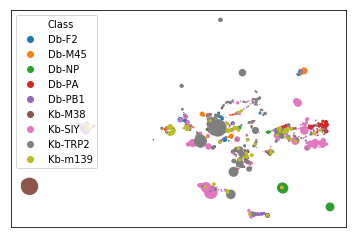

In [10]:
DTCR_SS.UMAP_Plot(by_class=True,freq_weight=True,scale=1000)

We can also specify whether we only want to plot sequences that were used in either train,valid, or the test set with the 'set' parameter.

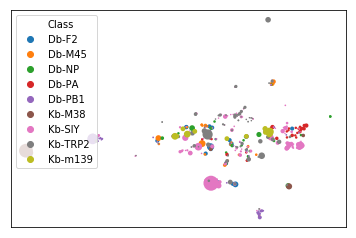

In [11]:
DTCR_SS.UMAP_Plot(by_class=True,freq_weight=True,scale=2000,set='test')

We can also visualize how the repertoires are related from this learned representation. This visualiztion is helpful when we want to compare how different TCR repertoires are related structurally.

UMAP transformation...
PhenoGraph Clustering...
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 3.4246816635131836 seconds
Jaccard graph constructed in 1.0992822647094727 seconds
Wrote graph to binary file in 0.4135909080505371 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.886302
Louvain completed 21 runs in 4.5533435344696045 seconds
PhenoGraph complete in 9.507049560546875 seconds
Clustering Done


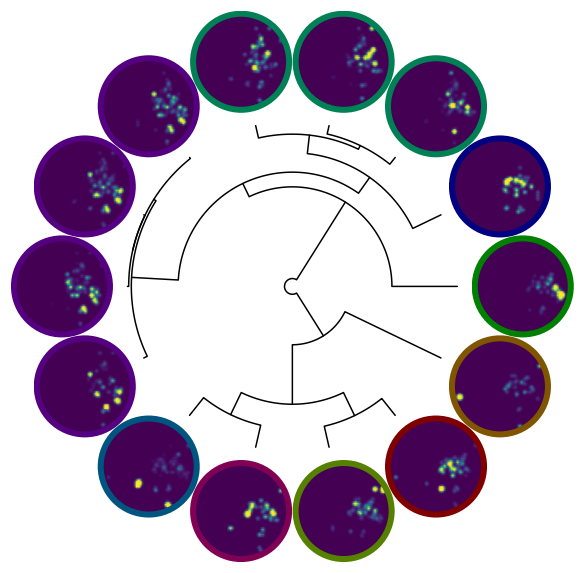

In [16]:
DTCR_SS.Repertoire_Dendrogram(gridsize=50,gaussian_sigma=0.75,lw=6,dendrogram_radius=0.3)

See documentation for how to use the full functionality of this method.